In [2]:
import numpy as np
import matplotlib.pyplot as plt 

###  I- Simulation sans méthode de reduction de la variance

### 1 première méthode : approximation par sommes de Riemann

In [3]:
# simulation de S_t

def b_s(r,sigma,s0,T,N):
    h = T/N
    S = [s0]
    W = np.random.randn(N)
    
    for i in range(1,N):
        S += [S[i-1] *np.exp( (r-sigma**2/2)*h+sigma*np.sqrt(h)*W[i-1] )]
    
    return(S)

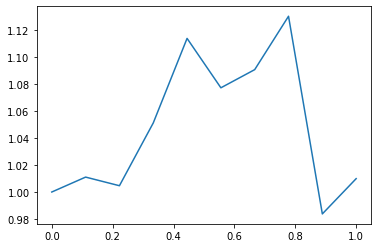

In [78]:
r = 0.1
sigma = 0.2
s0 = 1 
K = 1 
T = 1
N = 10
t = np.linspace(0,1,N)
S = b_s(r,sigma,s0,T,N)
plt.plot(t,S)

In [84]:
# P = e^{-rT} max(0, Y_T - K)
#Y = somme de 0 à n-1 de (1/T)*(S_tk)*h

def option_asiatique(n,M):
    
    #paramètres
    r = 0.1
    sigma = 0.2
    s0 = 1 
    K = 1 
    T = 1
    N = 10
    h = 10 


    S_tk = b_s(r,sigma,s0,T,N)
    Y= [s0] 
    
    for k in range(n):
        Y += [(h/T)*(S_tk[k])]

    P = []
    for j in range(M):
        P += [(1/M)*np.exp(-r*T)*(np.maximum(0, Y[j] - K ))]

    p = np.mean(P)
    s = np.std(P, ddof=1)
    return p , s
                
n,M = 10**4, 10**5
S_tk = option_asiatique(n,M)
p = S_tk[0]
s = S_tk[1]

print('Estimator: ',p)
print('Standart Deviation: ',s/n)
print('Confidence Interval 95%: ',[p-1.96*s/np.sqrt(n),p+1.96*s/np.sqrt(n)])
print('Relative Error:',100*1.96*s/(p*np.sqrt(n)),"%")                                    

IndexError: list index out of range